In [35]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from skimage.color import rgb2lab, lab2rgb

import time
import tqdm

import torch
from torch import nn
import torchvision

In [14]:
# use the Metal backend if available (for Apple computers)
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device('mps')
# use CUDA if available (for NVIDIA cards)
elif torch.cuda.is_available():
    device = torch.device('cuda')
# otherwise, use the CPU
else:
    device = torch.device('cpu')

print(f'Using device: {device}')

Using device: mps


In [15]:
SIZE = 160

data_train = torchvision.datasets.Imagenette("data", split='train', size="160px")
data_train.transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((SIZE, SIZE), PIL.Image.BICUBIC),
    torchvision.transforms.ToTensor()
])
# data_train = torch.utils.data.Subset(data_train, torch.arange(1_000))
len(data_train), data_train[0][0].shape

(9469, torch.Size([3, 160, 160]))

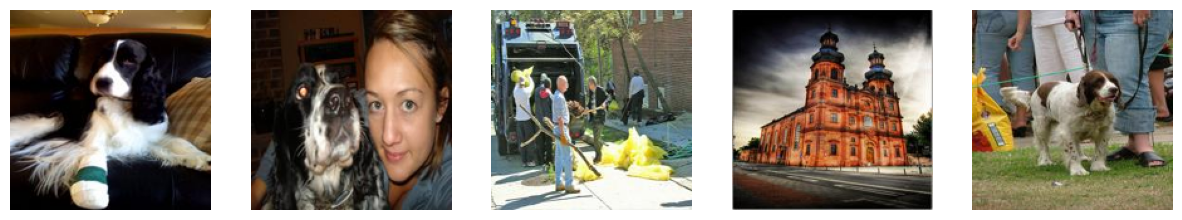

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(15,5))

for i in range(5):
    image, label = data_train[np.random.randint(len(data_train))]
    axs[i].axis('off')
    axs[i].imshow(image.permute(1, 2, 0))